In [1]:

import pickle
import pandas as pd
import numpy as np
import seaborn as sns



/home/kpr/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:

df=pd.read_csv("/content/drive/My Drive/NLP/nlp-getting-started/train.csv")

print(df.head())


   id keyword  ...                                               text target
0   1     NaN  ...  Our Deeds are the Reason of this #earthquake M...      1
1   4     NaN  ...             Forest fire near La Ronge Sask. Canada      1
2   5     NaN  ...  All residents asked to 'shelter in place' are ...      1
3   6     NaN  ...  13,000 people receive #wildfires evacuation or...      1
4   7     NaN  ...  Just got sent this photo from Ruby #Alaska as ...      1

[5 rows x 5 columns]


In [4]:
print(df.isnull().sum())


id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


(7613, 5)


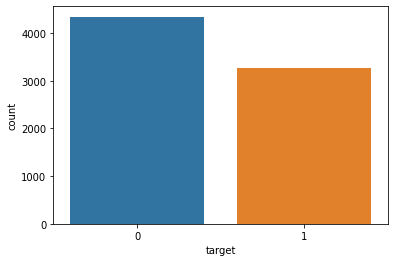

In [5]:
sns.countplot('target',data=df)
data=df.drop(['location','keyword','id'],axis=1)
print(df.shape)

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Cleaning the reviews

corpus = []
for i in range(0,7613):

  # Cleaning special character from the reviews
  review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=data['text'][i])
  

  # Converting the entire review into lower case
  review = review.lower()

  # Tokenizing the review by words
  review_words = review.split()
 
  # Removing the stop words
  review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
  
  # Stemming the words
  lemmatizer = WordNetLemmatizer()
  review = [lemmatizer.lemmatize(word) for word in review_words]

  # Joining the stemmed words
  review = ' '.join(review)
  
  # Creating a corpus
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [8]:
# Creating the Bag of Words 

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = data['target']
print(X.shape)
pickle.dump(cv, open('cvx-transform1.pkl', 'wb'))

(7613, 20679)


In [9]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

print(y_pred)
print(len(y_pred))

print(X_test.shape)
pickle.dump(cv, open('classifier.pkl', 'wb'))

[0 0 1 ... 1 0 1]
1523
(1523, 20679)


In [10]:
from sklearn.metrics import confusion_matrix

accuracy=confusion_matrix(y_test,y_pred )

print("confusion_matrix:",accuracy)



confusion_matrix: [[744 142]
 [177 460]]


In [11]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,y_pred )
print("accuracy_score:",accuracy)



accuracy_score: 0.7905449770190414


In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred ))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       886
           1       0.76      0.72      0.74       637

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



In [ ]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))


Accuracy score for alpha=0.1 is: 78.2%
Accuracy score for alpha=0.2 is: 78.59%
Accuracy score for alpha=0.3 is: 78.66%
Accuracy score for alpha=0.4 is: 78.73%
Accuracy score for alpha=0.5 is: 78.99%
Accuracy score for alpha=0.6 is: 79.05%
Accuracy score for alpha=0.7 is: 79.19%
Accuracy score for alpha=0.8 is: 79.25%
Accuracy score for alpha=0.9 is: 78.99%
Accuracy score for alpha=1.0 is: 79.05%
--------------------------------------------
The best accuracy is 79.25% with alpha value as 0.8
